<a href="https://colab.research.google.com/github/YASSIRAMRAOUI/Text-Mining/blob/main/Atelier_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atelier 6 : Language Modeling

Installer les bibliothèques nécessaires pour la réalisation de l'atemier:  

In [ ]:
!pip install nltk

In [ ]:
!pip install nltk


In [ ]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 91.7 MB/s eta 0:00:00


In [ ]:
!pip install keras


In [ ]:
!pip install tensorflow

# 1.	Tri-Gram Language Model


Le package nltk.lm sera utilisé pour l'implementation du modèle de langage Tri-gram. La documentation est disponible [ICI](https://www.nltk.org/api/nltk.lm.html). Également, des exemples sont disponibles [ICI](https://www.nltk.org/howto/lm.html)


On va considérer le corpus de reuters pour entrainer le modèle.

In [ ]:
# Recuperation du corpus
import nltk
nltk.download('all')
from nltk.corpus import reuters


# Liste des documents
print(len(reuters.fileids()))       # 10788 documents

# Catégories disponibles
print(reuters.categories())

# contenu d’un document
print(reuters.raw('test/14826'))
# Categories d’un document
print(reuters.categories('test/14826'))

#contenu des documents d'une categories

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

10788
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between t

Pour ce faire, choisisez une categorie parmi celles disponibles dans le corpus reuters afin de raliser l'entrainement du modèle.



In [ ]:
#job_news=reuters.raw(reuters.fileids("jobs"))

job_news = [reuters.raw(f) for f in reuters.fileids("jobs")]
print(job_news[0])     # premier article

GERMAN INDUSTRIAL EMPLOYMENT SEEN STAGNATING
  The number of workers employed in
  the West German industrial sector stagnated in the last quarter
  of 1986 as a 50,000 increase in overall employment benefited
  only the services branch, the DIW economic institute said.
      A DIW report added the general downturn in the economy
  since last Autumn had had a negative effect on the willingness
  of firms to take on workers. It referred to a marked downturn
  in the number of workers taken on in the capital goods sector.
      New orders for manufacturing industry goods have mostly
  fallen or stagnated in recent months, but data for February
  finally showed a reversal of the trend, with a 1.9 pct rise.
  




Réaliser une segmentation à base de phrases et faire pour chaque phrase un nettoyage en supprimant juste les caractères spéciaux et la ponctuation. Ensuite, générer les tri-grammes.

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import trigrams
import re

def Segmentation_trigrams(corpus):
  Vocabulary = set(['<s>', '</s>']) # Use a set for vocabulary for efficiency
  Trigrams = []

  # Define a tokenizer that keeps only words and spaces
  tokenizer = RegexpTokenizer(r'\w+|\s+')

  for doc in corpus:
    Sentences = sent_tokenize(doc)
    for sentence in Sentences:
      # Clean the sentence by removing special characters and punctuation
      cleaned_sentence = re.sub(r'[^\w\s]', '', sentence)
      # Tokenize the cleaned sentence
      tokens = tokenizer.tokenize(cleaned_sentence.lower()) # Convert to lowercase
      # Remove empty strings from tokens
      tokens = [token for token in tokens if token.strip()]

      # Add tokens to vocabulary
      Vocabulary.update(tokens)

      # Generate trigrams and pad them
      padded_tokens = list(pad_both_ends(tokens, n=3))
      sentence_trigrams = list(trigrams(padded_tokens))
      Trigrams.append(sentence_trigrams) # Append list of trigrams for each sentence


  return list(Vocabulary), Trigrams # Convert vocabulary set back to list

Vocabulary, doc_trigrams = Segmentation_trigrams(job_news) # Renamed Trigrams to doc_trigrams for clarity
print("Vocabulary size:", len(Vocabulary))
print("First 20 words in vocabulary:", list(Vocabulary)[:20])

Vocabulary size: 2127
First 20 words in vocabulary: ['dissenting', 'financial', 'uk', 'nearer', 'unemployment', 'pressing', 'opportunity', '78', 'barriers', 'income', 'can', 'ruling', 'figaro', 'hovering', 'francois', 'ministry', '05', '87', 'payrolls', 'began']


In [ ]:
doc_trigrams[0]

[('<s>', '<s>', 'german'),
 ('<s>', 'german', 'industrial'),
 ('german', 'industrial', 'employment'),
 ('industrial', 'employment', 'seen'),
 ('employment', 'seen', 'stagnating'),
 ('seen', 'stagnating', 'the'),
 ('stagnating', 'the', 'number'),
 ('the', 'number', 'of'),
 ('number', 'of', 'workers'),
 ('of', 'workers', 'employed'),
 ('workers', 'employed', 'in'),
 ('employed', 'in', 'the'),
 ('in', 'the', 'west'),
 ('the', 'west', 'german'),
 ('west', 'german', 'industrial'),
 ('german', 'industrial', 'sector'),
 ('industrial', 'sector', 'stagnated'),
 ('sector', 'stagnated', 'in'),
 ('stagnated', 'in', 'the'),
 ('in', 'the', 'last'),
 ('the', 'last', 'quarter'),
 ('last', 'quarter', 'of'),
 ('quarter', 'of', '1986'),
 ('of', '1986', 'as'),
 ('1986', 'as', 'a'),
 ('as', 'a', '50000'),
 ('a', '50000', 'increase'),
 ('50000', 'increase', 'in'),
 ('increase', 'in', 'overall'),
 ('in', 'overall', 'employment'),
 ('overall', 'employment', 'benefited'),
 ('employment', 'benefited', 'only'),


Pour l’entrainement du modèle nous utilisons une loi de Laplace pour calculer les differentes probabilités.

In [ ]:
#Maximum Likelihood Estimation
#Entraîne un modèle de langage n-grammes en estimant les probabilités par simple fréquence relative.
#P(wi​/wi−2​,wi−1​)=count(wi−2​,wi−1​,wi​)​/count(wi−2​,wi−1​)
from nltk.lm import MLE
model = MLE(3)
#Entraînement du modèle
model.fit(doc_trigrams, Vocabulary) #Trigrams

# #Laplace
# ##P(wi​/wi−2​,wi−1​)=(count(wi−2​,wi−1​,wi​)+1)​/(count(wi−2​,wi−1​)+​∣V​∣)​
# from nltk.lm import Laplace
# model = Laplace(3)
# #Entraînement du modèle
# model.fit(Trigrams, Vocabulary)

In [ ]:
print(model.counts)


<NgramCounter with 2 ngram orders and 13746 ngrams>


In [ ]:
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 2128 items>


In [ ]:
model.counts[['kind']]['of']


0

In [ ]:
model.score("of", ["kind", "of"])

0.0

In [ ]:
model.score('of','kind of'.split())

0.0

In [ ]:
#utiliser un random_seed pour fixer la generation des termes via le modèle
#model.generate(10,text_seed=['tax','free','market'],random_seed=1)
mots=model.generate(10,text_seed=['kind','of'],random_seed=0)
" ".join(mots)

'which we have not seen since the government into a'

In [ ]:
try:
    mots=model.generate(10,text_seed=['french','economy'],random_seed=0)
    print(" ".join(mots))
except ValueError as e:
    print(f"Error: {e}")
    print("The seed words 'french' and 'economy' may not exist in the corpus or don't have sufficient context.")
    print("Try using seed words that appear in the training data, such as: ['kind','of']")

Error: Can't choose from empty population
The seed words 'french' and 'economy' may not exist in the corpus or don't have sufficient context.
Try using seed words that appear in the training data, such as: ['kind','of']


In [ ]:
# Use a seed from the vocabulary that is likely to have associated trigrams
mots=model.generate(10,text_seed=['kind','of'],random_seed=0)
" ".join(mots)

'which we have not seen since the government into a'

# 2.	Neural Language Model


Pour concevoir un modèle de langage neuronal , nous considérons un reseau de neurones à trois couche. une couche d’entrée, une couche cachée et une couhe de sortie.

Les mots doivent être dotés d'une structure vectorielle avant de les introduire dans le processus d’apprentissage.

La couche de sortie comportera un vecteur contenant les probabilités de la  génération  des différents mots du vocabulaire.

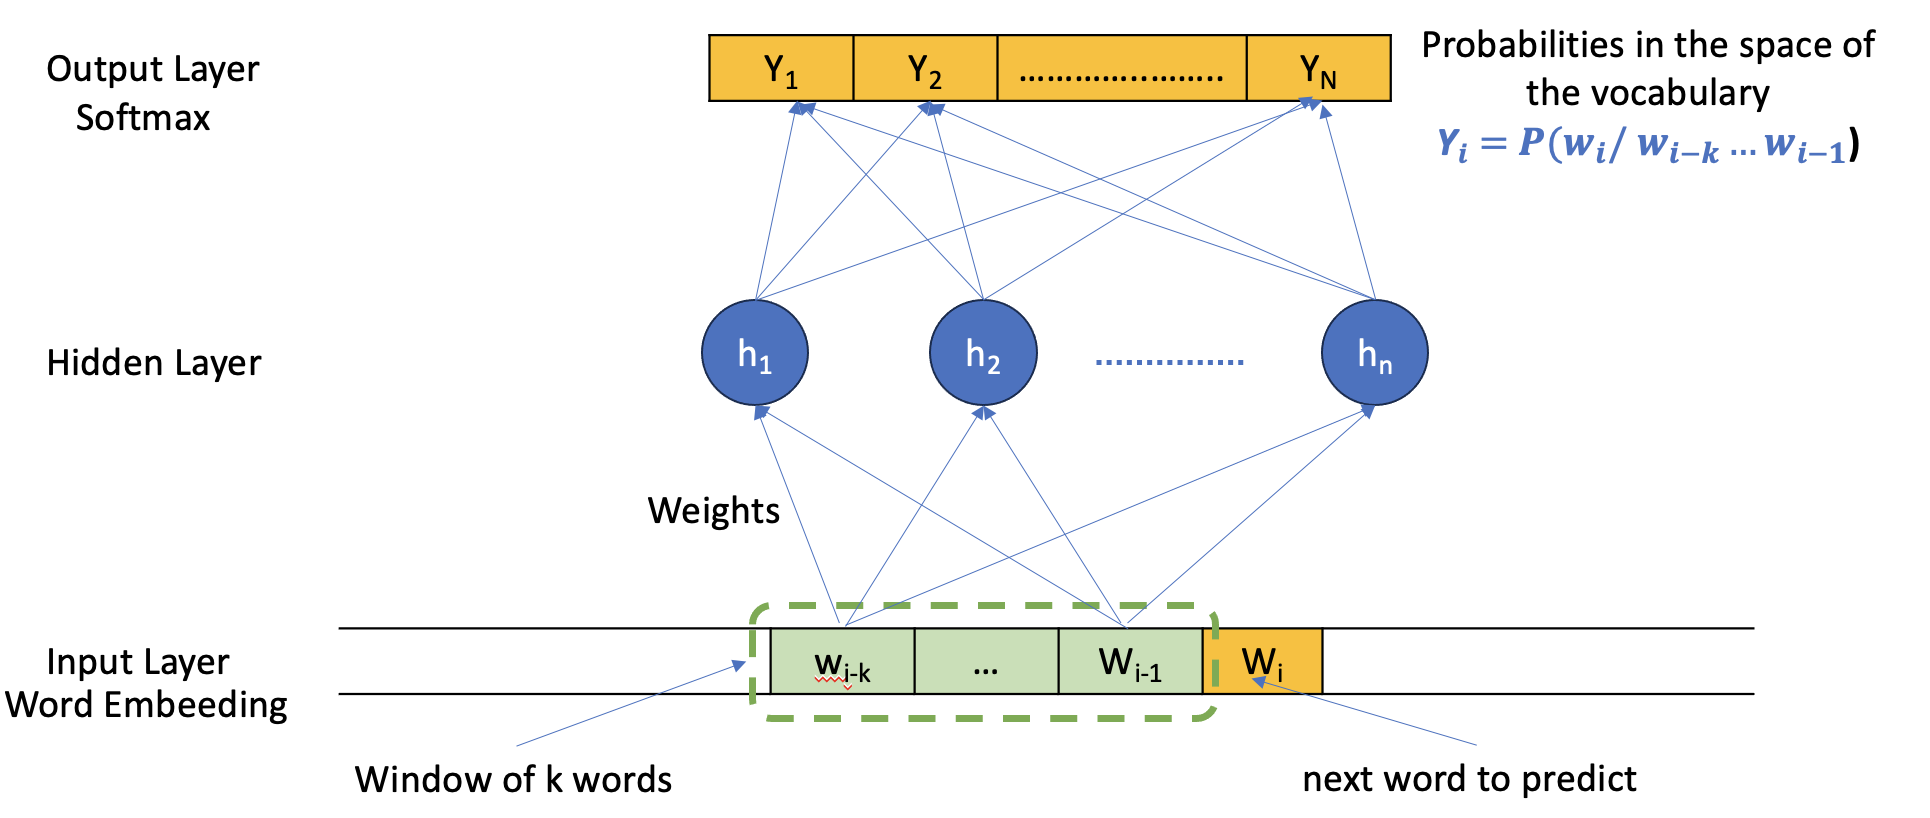

## 2.1 Preparation du dataset d'apprentissage:


Nous considérons toujour le même datset que la première section:

In [ ]:
#List de bigrams de la categories jobs du corpus reuters
print(Vocabulary)
print(doc_trigrams)

['dissenting', 'financial', 'uk', 'nearer', 'unemployment', 'pressing', 'opportunity', '78', 'barriers', 'income', 'can', 'ruling', 'figaro', 'hovering', 'francois', 'ministry', '05', '87', 'payrolls', 'began', 'confronting', 'try', 'soon', '110', 'importers', 'deficit', 'under', 'dollars', 'become', 'considering', 'luck', 'larger', 'relaunching', 'de', 'imported', 'moderate', 'july', 'enthusiasm', '2255000', 'consumers', 'concentrated', 'britain', '10203', '325', '194', 'prepared', 'lempers', 'stimulation', 'capital', 'ltd', 'credits', '368400', 'said', 'philippe', '79', '249', 'aeronautics', 'coordination', 'incentives', 'showing', 'genevabased', 'demand', 'sources', 'unit', 'productive', 'profits', 'remains', 'sharp', 'skeoch', '23085', 'agency', 'states', '593200', 'movement', 'working', 'continued', 'quarter', 'dallas', 'billion', 'announcing', 'payroll', 'introduced', '186', 'yearonyear', 'service', 'ahead', 'sixth', 'heldring', '180047', 'adjustment', 'position', 'months', 'prim




Pour la récupération des embeedings, la librairie Gensim fourni une implémentation de l'algorithme Word2Vec :

    *fasttext-wiki-news-subwords-300
    *conceptnet-numberbatch-17-06-300
    *word2vec-ruscorpora-300
    *word2vec-google-news-300
    *glove-wiki-gigaword-50
    *glove-wiki-gigaword-100
    *glove-wiki-gigaword-200
    *glove-wiki-gigaword-300
    *glove-twitter-25
    *glove-twitter-50
    *glove-twitter-100
    *glove-twitter-200

In [ ]:
import gensim.downloader
#un modèle Word2Vec pré-entraîné par Google sur un énorme corpus de 100 milliards de mots issus de Google News.
glove_vectors = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#verifier l'existance d'un mot dans le modèle
print("computer" in glove_vectors)
# Tester similarité entre mots
print(glove_vectors.similarity("king", "queen"))

# Trouver mots les plus proches
print(glove_vectors.most_similar("computer"))

# Analogies célèbres
print(glove_vectors.most_similar(positive=["king", "woman"], negative=["man"]))
# => devrait donner quelque chose comme: "queen"

# représentation du mot "word"
print(glove_vectors['computer'])


True
0.6510957
[('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426), ('technician_Leonard_Luchko', 0.5662748217582703), ('mainframes_minicomputers', 0.5617720484733582), ('laptop_computers', 0.5585449934005737), ('PC', 0.5539618730545044), ('maker_Dell_DELL.O', 0.5519254207611084)]
[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]
[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-0

In [ ]:
# print(glove_vectors['</s>'])
# glove_vectors['<s>'] = glove_vectors['</s>']


Dans un premier temps nous allons commencer par des inputs de type bigrams

In [ ]:
#TEST
import numpy

# Trigrams: list of lists of trigrams
# Vocabulary: list of unique words in Trigrams

# For training the model
# For a trigram <Wi-2, Wi-1, Wi>, the model should generate the vector with 1 at index of Wi

# Generation of the list of (Wi-2, Wi-1, Wi) for the entire corpus
trigrams_list = []
for sent_trigrams in doc_trigrams:
  for trigram in sent_trigrams:
    trigrams_list.append(trigram)

X = []
Y = []
for trigram in trigrams_list:
  # Ensure all words in the trigram are in the glove_vectors vocabulary
  if trigram[0] in glove_vectors and trigram[1] in glove_vectors and trigram[2] in glove_vectors:
    # Use the vectors of the first two words as input (context)
    x = numpy.concatenate((glove_vectors[trigram[0]], glove_vectors[trigram[1]]))
    X.append(x)

    # The output is the index of the third word in the vocabulary
    y = numpy.array([0] * len(Vocabulary))
    try:
      y[Vocabulary.index(trigram[2])] = 1
      Y.append(y)
    except ValueError:
        # Handle cases where the third word is not in the vocabulary
        pass


print(numpy.array(X).shape)  # Should be (num_samples, num_features)
print(numpy.array(Y).shape)  # Should be (num_samples, num_classes)

(7164, 600)
(7164, 2127)


In [ ]:
print(numpy.array(X).shape)  # Should be (num_samples, num_features)
print(numpy.array(Y).shape)  # Should be (num_samples, num_classes)

(7164, 600)
(7164, 2127)


## 2.1 Entrainement du modèle:


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Embedding, Flatten, Input
from keras.optimizers import Adam



# Create the model


model = Sequential([
    #shape of feature vectors
    Input(shape=(len(X[0]),)),  # Input layer
    # A fully connected (dense) hidden layer (10 neurons)
    Dense(10, activation='relu'),
    #Output layer, Softmax converts outputs into probabilities across classes.
    Dense(len(Vocabulary), activation='softmax'),  # Output layer with Softmax
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


# Train the model
model.fit(numpy.array(X), numpy.array(Y), epochs=500, batch_size=32)

# Evaluate the model (using the same data for simplicity)
loss, accuracy = model.evaluate(numpy.array(X), numpy.array(Y))
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0899 - loss: 7.1103
Epoch 2/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1271 - loss: 5.6225
Epoch 3/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1181 - loss: 5.5400
Epoch 4/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1385 - loss: 5.3639
Epoch 5/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1599 - loss: 5.2582
Epoch 6/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1701 - loss: 5.1050
Epoch 7/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1776 - loss: 5.0101
Epoch 8/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1798 - loss: 4.9471
Epoch 9/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2015 - loss: 4.8495
Epoch 10/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2017 - loss: 4.7735
Epoch 11/500
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2065 - loss: 4.6661
Epoch 12/500
224/224 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
def generate (start_words,n):
  sentence=" ".join(start_words)
  next_words = list(start_words) # Use a list to easily manipulate the seed words
  for i in range(n):
    # Ensure we have at least two words to form the context
    if len(next_words) < 2:
        break # Cannot generate if less than two words

    # Get the embeddings for the last two words and concatenate them
    try:
        input_vector = numpy.concatenate((glove_vectors[next_words[-2]], glove_vectors[next_words[-1]]))
    except KeyError:
        # Handle cases where seed words are not in glove_vectors vocabulary
        print(f"Error: One of the seed words '{next_words[-2]}' or '{next_words[-1]}' is not in the glove_vectors vocabulary.")
        break

    predictions = model.predict(numpy.array([input_vector]))
    predictions = predictions.tolist()[0]

    # Find the index of the word with the highest probability
    next_word_index = predictions.index(max(predictions))

    # Get the next word from the vocabulary
    next_word = Vocabulary[next_word_index]

    sentence=sentence+" "+next_word
    next_words.append(next_word) # Add the predicted word to the seed

  return sentence

# Example usage:
generate(["kind","of"],7)

Error: One of the seed words 'kind' or 'of' is not in the glove_vectors vocabulary.


'kind of'

# 3.Exercice 1: Tri-grams

Refaire le meme travail avec le tri-grams

# 4.LLMs

Nous decouverons dans cette section trois approches pour l'entrainement d'un LLM, à savoir, les MLM, les CLM et les modèles Seq2Seq

## 4.1 Causal language models

CLM is an autoregressive method where the model is trained to predict the next token in a sequence given the previous tokens. CLM is used in models like GPT-2 and GPT-3 and is well-suited for tasks such as text generation and summarization. However, CLM models have unidirectional context, meaning they only consider the past and not the future context when generating predictions.

A causal language model predicts the next token based on previous tokens. This task setup can be used to train the model unsupervised on plain text input, or to autoregressively generate plain text similar to the data used for training. This task can be used for pre-training or fine-tuning a GPT-2 model, simply by calling fit().

This model has a generate() method, which generates text based on a prompt. The generation strategy used is controlled by an additional sampler argument on compile(). You can recompile the model with different keras_hub.samplers objects to control the generation. By default, "top_k" sampling will be used.

This model can optionally be configured with a preprocessor layer, in which case it will automatically apply preprocessing to string inputs during fit(), predict(), evaluate() and generate(). This is done by default when creating the model with from_preset().


## 4.1.1 Exploration of GPT2

In [ ]:
!pip install --upgrade keras-hub
!pip install --upgrade keras



In [ ]:
import keras
import keras_hub
import numpy as np
gpt2_lm = keras_hub.models.GPT2CausalLM.from_preset("gpt2_base_en")


In [ ]:
#text generation
gpt2_lm.generate("I want to say", max_length=30)


'I want to say that I love the game and I love the way it works.\n\nI want to say I like the game and I'

In [ ]:
# Generate with batched prompts.
gpt2_lm.generate(["I want to say", "Where are you"], max_length=30)

["I want to say that I'm not the only one that's worried about the future of the Internet. The Internet has been a great place for",
 'Where are you at right now, you may be wondering? Well we have been doing our best to answer this. We are in a new phase']

In [ ]:
#Call fit() on a single batch.
features = ["big data technologies are about handling massive amount of data .", "Hive is a framwork for processing big data."]
gpt2_lm = keras_hub.models.GPT2CausalLM.from_preset("gpt2_base_en")
gpt2_lm.fit(x=features, batch_size=2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 78s 78s/step - loss: 0.0708 - sparse_categorical_accuracy: 0.2083


In [ ]:
gpt2_lm.generate(["I want to say", "Big data"], max_length=30)

["I want to say something about my own experiences as a writer and a writer of fiction. I think it's important to acknowledge that writing fiction can",
 "Big data analytics and machine learning can help you better understand the world of data and understand the challenges that come with it. We're excited about the"]

## 4.2 Masked language models

Un Masked Language Model (MLM) est un modèle de langage bidirectionnel : il est entraîné à prédire un ou plusieurs tokens manquants dans une séquence, en utilisant le contexte avant et après le mot masqué.

Contrairement aux CLM, les MLM ne sont pas utilisés pour générer du texte, mais pour comprendre le texte. C’est la base des modèles comme BERT, RoBERTa, DistilBERT.

Concretement Les tokens [MASK] sont introduits dans la séquence et le modèle est entraîné à deviner le token masqué.



In [ ]:
# Charger le modèle BERT en mode MLM
bert_mlm = keras_hub.models.BertMaskedLM.from_preset("bert_base_en")


In [ ]:
# Prédiction sur une phrase contenant un token masqué
sentence = ["Machine learning is a [MASK] field."]
predictions = bert_mlm.predict(sentence)

# The output of predict is the logits for the masked token.
# We need to find the token with the highest probability for the masked position.
# The tokenizer is part of the bert_mlm model.
tokenizer = bert_mlm.preprocessor.tokenizer

# Assuming the mask token is at index 4 in the tokenized sequence.
# The predictions shape is (batch_size, sequence_length, vocab_size)
masked_token_logits = predictions[0, 4, :]
masked_token_id = np.argmax(masked_token_logits)
predicted_token = tokenizer.detokenize([masked_token_id])

print(f"Original sentence: {sentence[0]}")
print(f"Predicted token for [MASK]: predicted_token.numpy().decode('utf-8')")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Original sentence: Machine learning is a [MASK] field.
Predicted token for [MASK]: predicted_token.numpy().decode('utf-8')


In [ ]:
# Petit jeu de données personnalisé
texts = [
    "Deep learning is a [MASK] of machine learning.",
    "Natural language processing is a [MASK] of AI."
]

# Entraînement rapide sur ces données
bert_mlm.fit(texts, batch_size=2)

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:870: UserWarning: Gradients do not exist for variables ['pooled_dense/kernel', 'pooled_dense/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 76s 76s/step - loss: 0.2185 - sparse_categorical_accuracy: 0.0000e+00


## 4.3 Seq2Seq language models

Les modèles Seq2Seq (sequence-to-sequence) transforment une séquence d'entrée en une séquence de sortie, souvent de longueur différente. Ils utilisent une architecture encodeur → décodeur, avec ou sans attention.

Exemples : T5, BART, mT5, MarianMT

Architecture typique :Input Sequence → [Encoder] → [Context Vector] → [Decoder] → Output Sequence

L’encodeur convertit l’entrée en représentation vectorielle. Le décodeur génère la sortie, un token à la fois.

In [ ]:
!pip install --upgrade keras-nlp keras


  Attempting uninstall: keras-nlp
    Found existing installation: keras-nlp 0.21.1
    Uninstalling keras-nlp-0.21.1:
      Successfully uninstalled keras-nlp-0.21.1
